In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv('titanic.csv')

In [100]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
#checking for any missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
x = data[['Pclass','SibSp','Parch','Fare']]
y = data['Survived']

# **Preprocessing**

Text(0.5, 1.0, 'boxplot for Pclass')

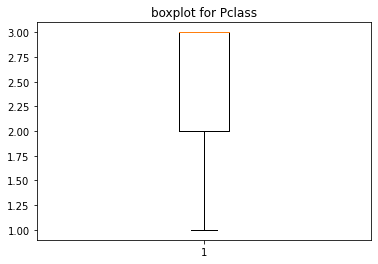

In [104]:
# checks for outliers
plt.boxplot(x.Pclass)
plt.title('boxplot for Pclass')


Text(0.5, 1.0, 'boxplot for SibSp')

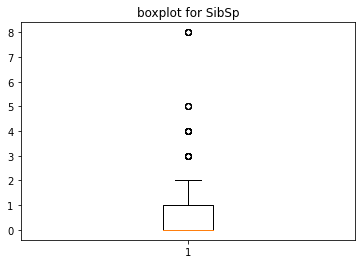

In [105]:
plt.boxplot(x['SibSp'])
plt.title('boxplot for SibSp')

In [106]:
#removing outliers
q1 = np.percentile(x['SibSp'],25,interpolation='midpoint')
q2 = np.percentile(x['SibSp'],50,interpolation='midpoint')
q3 = np.percentile(x['SibSp'],75,interpolation='midpoint')
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
upperoutlier = x['SibSp'] >upper
indexu = x.loc[upperoutlier].index
loweroutlier = x['SibSp'] <lower
indexl = x.loc[loweroutlier].index
print('Upper outliers:',indexu)
print('Lower outliers:',indexl)

Upper outliers: Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')
Lower outliers: Int64Index([], dtype='int64')


In [107]:
x.drop(indexu,inplace=True)
y.drop(indexu,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1.0, 'boxplot for Fare')

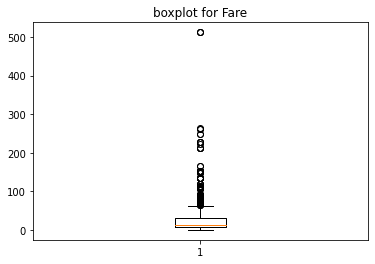

In [110]:
plt.boxplot(x['Fare'])
plt.title('boxplot for Fare')

Text(0.5, 1.0, 'boxplot for Parch')

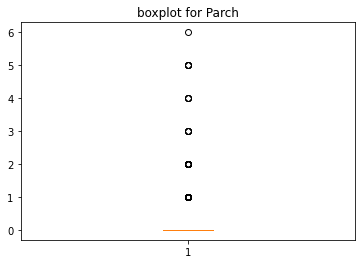

In [111]:
plt.boxplot(x['Parch'])
plt.title('boxplot for Parch')

In [112]:
q1 = np.percentile(x['Fare'],25,interpolation='midpoint')
q2 = np.percentile(x['Fare'],50,interpolation='midpoint')
q3 = np.percentile(x['Fare'],75,interpolation='midpoint')
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
upperoutlier = x['Fare'] >upper
indexu = x.loc[upperoutlier].index
loweroutlier = x['Fare'] <lower
indexl = x.loc[loweroutlier].index
print('Upper outliers:',indexu)
print('Lower outliers:',indexl)

Upper outliers: Int64Index([  1,  31,  34,  52,  61,  62,  72,  97, 102, 118,
            ...
            765, 779, 789, 802, 820, 829, 835, 849, 856, 879],
           dtype='int64', length=109)
Lower outliers: Int64Index([], dtype='int64')


In [118]:
x.drop(indexu,inplace=True)
y.drop(indexu,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [132]:
q1 = np.percentile(x['Parch'],25,interpolation='midpoint')
q2 = np.percentile(x['Parch'],50,interpolation='midpoint')
q3 = np.percentile(x['Parch'],75,interpolation='midpoint')
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
upperoutlier = x['Parch'] >upper
indexu = x.loc[upperoutlier].index
loweroutlier = x['Parch'] <lower
indexl = x.loc[loweroutlier].index
print('Upper outliers:',indexu)
print('Lower outliers:',indexl)

Upper outliers: Int64Index([  8,  10,  13,  25,  43,  54,  58,  65,  78,  86,
            ...
            848, 852, 853, 855, 858, 869, 871, 880, 885, 888],
           dtype='int64', length=129)
Lower outliers: Int64Index([], dtype='int64')


In [133]:
x.drop(indexu,inplace=True)
y.drop(indexu,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [134]:
x.shape

(607, 4)

In [135]:
y.shape

(607,)

#outlier removal reduces the dataset and accuracy score is also reduced hence not removing outilers

In [151]:
x = data[['Pclass','SibSp','Parch','Fare']]
y = data['Survived']

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [153]:
#scaling data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)   
x_test = sc.transform(x_test)

# **Logistic Regression**

In [154]:
, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logisticmodel = LogisticRegression()
logisticmodel.fit(x_train,y_train)
y_pred = logisticmodel.predict(x_test)
accuracy_score(y_pred,y_test)

0.7130044843049327

K-fold cross validation

In [155]:
from sklearn.model_selection import cross_val_score,KFold
kfold = KFold(n_splits=10)
score = cross_val_score(LogisticRegression(),x,y,cv=kfold,verbose=2)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Cross Validation Scores are [0.58888889 0.66292135 0.71910112 0.61797753 0.69662921 0.6741573
 0.70786517 0.70786517 0.74157303 0.75280899]
Average Cross Validation score :0.6869787765293383

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


maximum accuracy obtained is 0.7528

# **KNN**

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
y_predknn = knnmodel.predict(x_test)
accuracy_score(y_predknn,y_test)

0.7309417040358744

Cross validation -K fold

In [157]:
kfold = KFold(n_splits=10)
score = cross_val_score(KNeighborsClassifier(),x,y,cv=kfold,verbose=2)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Cross Validation Scores are [0.64444444 0.60674157 0.59550562 0.60674157 0.66292135 0.75280899
 0.69662921 0.70786517 0.68539326 0.74157303]
Average Cross Validation score :0.670062421972534

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


maximum accuracy obtained is 0.7528

# **SVM**

In [142]:
from sklearn.svm import SVC
svcmodel = SVC(gamma='auto')
svcmodel.fit(x_train,y_train)
y_predsvm = svcmodel.predict(x_test)
accuracy_score(y_predsvm,y_test)

0.7368421052631579

In [158]:
kfold = KFold(n_splits=10)
score = cross_val_score(SVC(gamma='auto'),x,y,cv=kfold,verbose=2)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Cross Validation Scores are [0.64444444 0.64044944 0.69662921 0.58426966 0.70786517 0.73033708
 0.64044944 0.73033708 0.78651685 0.79775281]
Average Cross Validation score :0.695905118601747

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


Maximum accuracy obtained is 0.7977

# **Decision Tree**

In [159]:
from sklearn.tree import DecisionTreeClassifier
detrmodel = DecisionTreeClassifier()
detrmodel.fit(x_train,y_train)
y_predetr = detrmodel.predict(x_test)
accuracy_score(y_predetr,y_test)

0.695067264573991

In [160]:
kfold = KFold(n_splits=10)
score = cross_val_score(DecisionTreeClassifier(),x,y,cv=kfold,verbose=2)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Cross Validation Scores are [0.67777778 0.6741573  0.6741573  0.56179775 0.62921348 0.78651685
 0.65168539 0.71910112 0.75280899 0.70786517]
Average Cross Validation score :0.683508114856429

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


maximum accuracy0.7865

# **Random Forest**

In [161]:
from sklearn.ensemble import RandomForestClassifier
rdmmodel = RandomForestClassifier()
rdmmodel.fit(x_train,y_train)
y_predrdm = rdmmodel.predict(x_test)
accuracy_score(y_predrdm,y_test)

0.6905829596412556

In [162]:
kfold = KFold(n_splits=10)
score = cross_val_score(RandomForestClassifier(),x,y,cv=kfold,verbose=2)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
Cross Validation Scores are [0.68888889 0.62921348 0.6741573  0.59550562 0.64044944 0.7752809
 0.71910112 0.76404494 0.75280899 0.74157303]
Average Cross Validation score :0.6981023720349564


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s finished


maximum accuracy score 0.7752

# **Grid Search**

In [163]:
parameters ={ 'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
            }

In [166]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    SVC(), 
    parameters, 
    cv=10,
    scoring='accuracy',n_jobs=-1,verbose=2)

In [167]:
grid_result= grid_search.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best Params:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score:  0.7170511080958841
